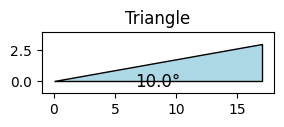

In [1]:

from pathlib import Path
from tkinter import Tk, Canvas, Entry, Text, Button, PhotoImage, Label
from tkinter.ttk import Combobox  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

OUTPUT_PATH = Path().resolve()
ASSETS_PATH = OUTPUT_PATH /"frame0"

def relative_to_assets(path: str) -> Path:
    return ASSETS_PATH / Path(path)


def calculate_and_plot():
    try:
        # Get input values, default to 0 if not provided
        degree_input = entry_1.get()  # Degree input
        adj_input = entry_2.get()     # Adjacent side input
        opp_input = entry_3.get()     # Opposite side input
        hyp_input = entry_4.get()     # Hypotenuse input

        # Convert inputs to float or default to 0
        degree = float(degree_input) if degree_input else 0
        adj = float(adj_input) if adj_input else 0
        opp = float(opp_input) if opp_input else 0
        hyp = float(hyp_input) if hyp_input else 0

        # Convert degree to radians 
        angle_rad = np.radians(degree) if degree else 0

        result_text = ""

        given_values = []
        if degree_input:
            given_values.append(f"Degree: {degree:.2f}°")
        if adj_input:
            given_values.append(f"Adjacent: {adj:.2f}")
        if opp_input:
            given_values.append(f"Opposite: {opp:.2f}")
        if hyp_input:
            given_values.append(f"Hypotenuse: {hyp:.2f}")

        # Calculate missing values and include solutions
        if adj == 0 and opp != 0 and degree != 0:
            adj = opp / np.tan(angle_rad)
            result_text += (
                f"Calculated Adjacent: {adj:.2f}\n"
                f"Solution: adj = opp / tan(angle)\n"
                f"adj = {opp:.2f} / tan({degree:.2f}°)\n"
                f"adj = {adj:.2f}\n\n"
            )

        if opp == 0 and adj != 0 and degree != 0:
            opp = adj * np.tan(angle_rad)
            result_text += (
                f"Calculated Opposite: {opp:.2f}\n"
                f"Solution: opp = adj * tan(angle)\n"
                f"opp = {adj:.2f} * tan({degree:.2f}°)\n"
                f"opp = {opp:.2f}\n\n"
            )

        if hyp == 0 and adj != 0 and opp != 0:
            hyp = np.sqrt(adj**2 + opp**2)
            result_text += (
                f"Calculated Hypotenuse: {hyp:.2f}\n"
                f"Solution: hyp = sqrt(adj² + opp²)\n"
                f"hyp = sqrt({adj:.2f}² + {opp:.2f}²)\n"
                f"hyp = {hyp:.2f}\n\n"
            )

        if adj == 0 and hyp != 0 and opp != 0:
            adj = np.sqrt(hyp**2 - opp**2)
            result_text += (
                f"Calculated Adjacent: {adj:.2f}\n"
                f"Solution: adj = sqrt(hyp² - opp²)\n"
                f"adj = sqrt({hyp:.2f}² - {opp:.2f}²)\n"
                f"adj = {adj:.2f}\n\n"
            )

        if opp == 0 and hyp != 0 and adj != 0:
            opp = np.sqrt(hyp**2 - adj**2)
            result_text += (
                f"Calculated Opposite: {opp:.2f}\n"
                f"Solution: opp = sqrt(hyp² - adj²)\n"
                f"opp = sqrt({hyp:.2f}² - {adj:.2f}²)\n"
                f"opp = {opp:.2f}\n\n"
            )

        if degree == 0 and opp != 0 and hyp != 0:
            degree = np.degrees(np.arcsin(opp / hyp))
            result_text += (
                f"Calculated Degree: {degree:.2f}°\n"
                f"Solution: angle = arcsin(opp / hyp)\n"
                f"angle = arcsin({opp:.2f} / {hyp:.2f})\n"
                f"angle = {degree:.2f}°\n\n"
            )

        if degree == 0 and adj != 0 and hyp != 0:
            degree = np.degrees(np.arccos(adj / hyp))
            result_text += (
                f"Calculated Degree: {degree:.2f}°\n"
                f"Solution: angle = arccos(adj / hyp)\n"
                f"angle = arccos({adj:.2f} / {hyp:.2f})\n"
                f"angle = {degree:.2f}°\n\n"
            )

        result_text = (
            f"Given Values:\n" +
            "\n".join(given_values) +
            "\n\n" + result_text
        )

        # Update the solution with calculations
        canvas.itemconfig(result_label, text=result_text)

        # Plot the triangle
        if adj != 0 and opp != 0 and hyp != 0:
            plot_triangle(adj, opp, hyp, degree)
        else:
            canvas.itemconfig(result_label, text="Unable to plot: insufficient data.")
            
    except ValueError:
        canvas.itemconfig(result_label, text="Please enter valid numbers for the sides.")


# Function to plot the triangle
def plot_triangle(adj, opp, hyp, degree, max_height=10, min_height=-1):
    # Remove palceholder
    canvas.delete("default_image")  # 

    fig, ax = plt.subplots(figsize=(3, 3))  # Set figure size to 3x3 inches
    fig.patch.set_visible(False)
    ax.set_facecolor('none')  

    # Define the triangle's vertices
    vertices = [(0, 0), (adj, 0), (adj, opp)]   
    triangle = plt.Polygon(vertices, closed=True, edgecolor='black', facecolor='lightblue')
    ax.add_patch(triangle)

    # Label the angle
    ax.text(adj / 2, -0.5, f'{degree}°', fontsize=12, ha='center', color='black')

    # Set axis limits
    ax.set_xlim(-1, adj + 1)
    ax.set_ylim(-1, opp + 1)
    ax.set_aspect('equal', 'box')
    ax.set_title('Triangle')

    # Display the plot on the Tkinter window
    canvas_plot = FigureCanvasTkAgg(fig, window)
    canvas_plot.get_tk_widget().place(x=30.0, y=120.0)  # Place the graph at the specified coordinates
    canvas_plot.draw()



window = Tk()

window.geometry("700x550")
window.configure(bg = "#FFE873")


canvas = Canvas(
    window,
    bg = "#FFE873",
    height = 550,
    width = 700,
    bd = 0,
    highlightthickness = 0,
    relief = "ridge"
)

canvas.place(x = 0, y = 0)
canvas.create_rectangle(
    0.0,
    0.0,
    700.0,
    94.0,
    fill="#306998",
    outline="")

canvas.create_text(
    17.0,
    12.0,
    anchor="nw",
    text="Graphing Tool for \nBasic Trigonometric Functions",
    fill="#FFFFFF",
    font=("Murecho SemiBold", 32 * -1)
)

canvas.create_rectangle(
    0.0,
    523.0,
    700.0,
    550.0,
    fill="#306998",
    outline="")


canvas.create_text(
    349.0,
    110.0,
    anchor="nw",
    text="Solution",
    fill="#000000",
    font=("Murecho SemiBold", 20 * -1)
)

image_image_1 = PhotoImage(file=relative_to_assets("image_1.png"))
window.image_image_1 = image_image_1  
image_1 = canvas.create_image(
    175.0,
    283.0,
    image=image_image_1,
    tags="default_image"
)

image_image_2 = PhotoImage(file=relative_to_assets("image_2.png"))
window.image_image_2 = image_image_2  
image_2 = canvas.create_image(
    520.0,
    283.0,
    image=image_image_2
)

canvas.create_text(
    5.0,
    110.0,
    anchor="nw",
    text="Graph",
    fill="#000000",
    font=("Murecho SemiBold", 20 * -1),
    tags="default_image"
)

canvas.create_text(
    152.0,
    431.0,
    anchor="nw",
    text="Enter Adj",
    fill="#306998",
    font=("Murecho SemiBold", 16 * -1)
)

canvas.create_text(
    284.0,
    431.0,
    anchor="nw",
    text="Enter Opp",
    fill="#306998",
    font=("Murecho SemiBold", 16 * -1)
)

canvas.create_text(
    35.0,
    431.0,
    anchor="nw",
    text="Enter Degrees",
    fill="#306998",
    font=("Murecho SemiBold", 16 * -1)
)

canvas.create_text(
    416.0,
    431.0,
    anchor="nw",
    text="Enter Hyp",
    fill="#306998",
    font=("Murecho SemiBold", 16 * -1)
)

image_image_3 = PhotoImage(
    file=relative_to_assets("image_3.png"))
image_3 = canvas.create_image(
    659.9999967736619,
    43.0,
    image=image_image_3
)

entry_image_1 = PhotoImage(
    file=relative_to_assets("entry_1.png"))
entry_bg_1 = canvas.create_image(
    107.0,
    480.0,
    image=entry_image_1
)
entry_1 = Entry(
    bd=0,
    bg="#EDEDED",
    fg="#000716",
    highlightthickness=0
)
entry_1.place(
    x=59.0,
    y=465.0,
    width=96.0,
    height=28.0
)

entry_image_2 = PhotoImage(
    file=relative_to_assets("entry_2.png"))
entry_bg_2 = canvas.create_image(
    244.0,
    480.0,
    image=entry_image_2
)
entry_2 = Entry(
    bd=0,
    bg="#EDEDED",
    fg="#000716",
    highlightthickness=0
)
entry_2.place(
    x=196.0,
    y=465.0,
    width=96.0,
    height=28.0
)

entry_image_3 = PhotoImage(
    file=relative_to_assets("entry_3.png"))
entry_bg_3 = canvas.create_image(
    374.0,
    480.0,
    image=entry_image_3
)
entry_3 = Entry(
    bd=0,
    bg="#EDEDED",
    fg="#000716",
    highlightthickness=0
)
entry_3.place(
    x=326.0,
    y=465.0,
    width=96.0,
    height=28.0
)

entry_image_4 = PhotoImage(
    file=relative_to_assets("entry_4.png"))
entry_bg_4 = canvas.create_image(
    500.0,
    480.0,
    image=entry_image_4
)
entry_4 = Entry(
    bd=0,
    bg="#EDEDED",
    fg="#000716",
    highlightthickness=0
)
entry_4.place(
    x=452.0,
    y=465.0,
    width=96.0,
    height=28.0
)

button_image_1 = PhotoImage(file=relative_to_assets("button_1.png"))
button_1 = Button(
    image=button_image_1,
    borderwidth=0,
    highlightthickness=0,
    command=calculate_and_plot, 
    relief="flat"
)
button_1.place(
    x=589.0,
    y=450.0,
    width=83.0,
    height=50.0
)


result_label = canvas.create_text(500, 300, text="", fill="black", font=("Arial", 12))

window.resizable(False, False)
window.mainloop()
